**2 - You will use the dataset of Combined cycle power plant. The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. You are expected to predict Net hourly electrical energy output.(EP). You should implement a neural network for this prediction. Evaluate your results after implementing neural network. You can use Colab for the assignment.**

Note: Use MSE(minimum squared error) for the loss function.
See for description of the data: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

For downloading: https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, explained_variance_score
# from sklearn.metrics import classification_report,confusion_matrix, f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# might be needed depending on your version of Jupyter
%matplotlib inline

In [2]:
df = pd.read_excel("Folds5x2_pp.xlsx", engine= "openpyxl")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


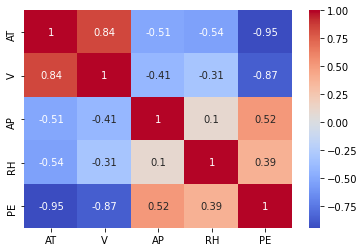

In [5]:
# plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True);

In [6]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape, y_train.shape

((7654, 4), (7654,))

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# from sklearn.preprocessing import RobustScaler
# sc = RobustScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [11]:
model = Sequential()

model.add(Dense(4,activation='relu')) #4 feature var, Dense 4 seceriz.
# model.add(Dense(2,activation='relu'))
model.add(Dense(1)) # regresyon oldugu icin output layer Dense 1 secilir, aktivation function olmaz.
opt=Adam(lr=0.001)
model.compile(optimizer=opt,loss='mse')

In [12]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=2,epochs=100,
          callbacks=[early_stop])

Epoch 1/100
3827/3827 [==============================] - 5s 1ms/step - loss: 175848.1719 - val_loss: 124001.1953
Epoch 2/100
3827/3827 [==============================] - 4s 1ms/step - loss: 69232.1250 - val_loss: 26543.2402
Epoch 3/100
3827/3827 [==============================] - 4s 1ms/step - loss: 12637.4824 - val_loss: 6195.3911
Epoch 4/100
3827/3827 [==============================] - 4s 1ms/step - loss: 3484.8838 - val_loss: 1523.4855
Epoch 5/100
3827/3827 [==============================] - 4s 1ms/step - loss: 696.5161 - val_loss: 270.9397
Epoch 6/100
3827/3827 [==============================] - 4s 1ms/step - loss: 124.8898 - val_loss: 58.1497
Epoch 7/100
3827/3827 [==============================] - 4s 1ms/step - loss: 34.1845 - val_loss: 29.0109
Epoch 8/100
3827/3827 [==============================] - 4s 1ms/step - loss: 23.5731 - val_loss: 24.4931
Epoch 9/100
3827/3827 [==============================] - 4s 1ms/step - loss: 22.1295 - val_loss: 23.8110
Epoch 10/100
3827/3827 [=====

### Evaluation

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (2, 4)                    20        
_________________________________________________________________
dense_1 (Dense)              (2, 1)                    5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Alternative Summary
# It is working in Google Colab

# from tensorflow.keras.utils import plot_model
# dot_img_file = '/tmp/model_1.png'
# plot_model(model, to_file=dot_img_file, show_shapes=True)

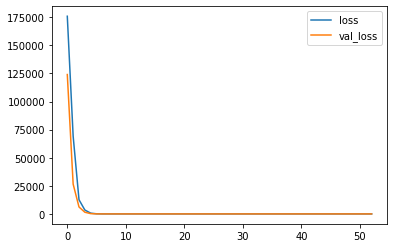

In [15]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

**Loss-Epoch Graph**

(0.0, 60.0)

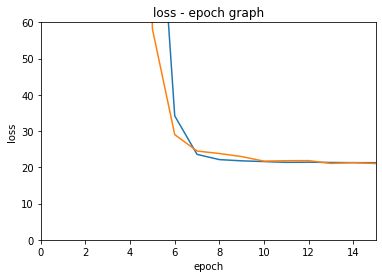

In [16]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,15]) # focusing on the given x values
ax.set_ylim([0,60]) # focusing on the given y values

**Evaluation Metrics**

In [17]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
#     mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
#           f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [18]:
#Training Data
y_train_pred = model.predict(X_train)
eval_metrics(y_train, y_train_pred)

R2 Score: 0.9294118828410356
Mean Absolute Error(MAE): 3.5670690539987766
Root Mean Square Error(RMSE): 4.536348439477501


In [19]:
# Test Data
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9307685224948264
Mean Absolute Error(MAE): 3.5460328054079318
Root Mean Square Error(RMSE): 4.481198780619793


In [20]:
# Alternatively
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

print('training_msa:',training_score,
      '\ntest_msa:', test_score,sep='')

training_msa:20.57845687866211
test_msa:20.08115005493164


* In the above code, model.evaluate() gives MSE Score. Because, as a loss parametre, we use loss="mse" in model.compile() when we create the model.

In [21]:
explained_variance_score(y_test,y_pred)

0.930779742745576

> **explained_variance_score**

> hata varyansi ile gercek degerin varyansi arasindaki orani hesaplamak icin kullanilan bir metrik. Modelin veri setindeki farkli varyasyonlari ne kadar iyi aciklayabildigini gosteren puandir. Genellikle 0,6 treshold uzeri olmasi beklenir.

**Let's compare to the real test labels!**

In [22]:
y_test.shape, y_pred.shape

((1914,), (1914, 1))

In [23]:
my_dict={"Actual":y_test, 
         "Pred":y_pred.reshape(-1,)}

compare=pd.DataFrame(my_dict)
compare.sample(5)

,Actual,Pred
1385,448.32,446.378601
86,477.07,477.417328
267,487.94,484.152405
1496,425.18,427.692078
1881,432.64,434.943848


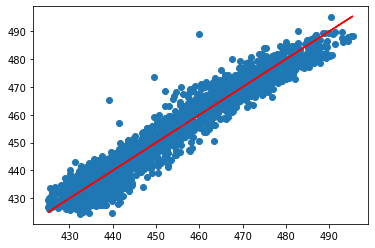

In [24]:
plt.scatter(compare.Actual,compare.Pred)
plt.plot(compare.Actual,compare.Actual,'r');

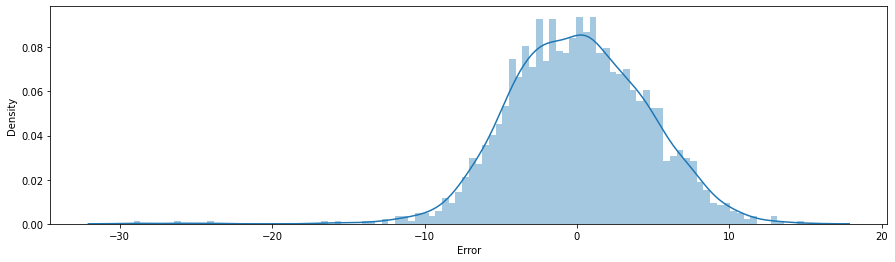

In [25]:
plt.figure(figsize=(15,4))
compare['Error'] = compare['Actual'] - compare['Pred']
sns.distplot(compare['Error'],kde=True,bins=100);

# Results
- A model with artificial neural networks was trained. 0.93 (test data) R2 Scored with best tuninng parameters was gotten.
- 4 input neurons and 1 output neuron were used. There was no hidden neuron.
- `early_stop` was used to save time in model training.